# Le modèle SIR

*Serge-Étienne Parent*

## Qu'est-ce qu'un modèle SIR?

Le modèle SIR suppose que la population totale, $N$ est composée de personnes pouvant être classées comme susceptibles d'être infectées ($S$), infectées ($I$) ou ne pouvant plus être infectées ($R$, pour retirées). Les $R$ sont autant les personnes immunisées après avoir été contaminées... que les personnes décédées. 

$$N = S(t) + I(t) + R(t)$$

Les personnes susceptibles peuvent migrer vers la catégorie des infectées, et les personnes infectées peuvent migrer vers la catégorie des retirées (figure 1).

![](https://gitlab.com/essicolo/blog_sm/-/raw/master/2020-04-14_modele-sir/images/flow.png)

<small>Figure 1. Migration entre les compartiments $S$, $I$ et $R$.</small>

Nous cherchons comment évolueront des effectifs initiaux dans chaque contenants selon les flux qui les relient. Puisque nous désirons **modéliser la variation dans le temps**, nous sommes confrontés à un problème d'équation différentielle (modéliser la vaeriation) ordinaire (en fonction d'une seule variable, le temps).

### Variation sur $S$

Les personnes susceptibles cesseront de l'être lorsqu'elles migrront vers le stade d'infection. On les retirera du bilan proportionnellement à $S$ et à $I$ à un taux $\alpha$.

$$\frac{dS}{dt} = -\alpha S I $$

Si $S$ et $I$ sont chacun exprimés en effectifs (disons en $personne$), et que la dérivée $\frac{dS}{dt}$ doit être exprimée en $\frac{personne}{jour}$, le paramètre $\alpha$ devra être un taux en terme de $\frac{1}{personne \cdot jour}$. Plus $\alpha$ est élevé, plus l'infection se dispersera rapidement.

### Variation sur $I$

L'effectif $I$ accumulera ce qui sort de l'effectif $S$ ($\alpha \times S \times I$). De plus, l'effectif $I$ diminuera avec la rémission (ou la mortalité) assciée à un taux $\beta$.

$$\frac{dI}{dt} = \alpha S I -\beta I $$

Le taux $\beta$ sera exprimé en $1/jour$. Son inverse est le nombre de jours nécessaires pour une rémission.

### Variation sur $R$

Enfin, les $R$ accumuleront ce qui sort de l'état d'infection.

$$\frac{dR}{dt} = \beta I $$

Si l'on prend la somme des variations,

$$\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = -\alpha S I + \alpha S I -\beta I + \beta I = 0$$

Le modèle ne suggérant aucune variation, la population totale est prise comme constante.

## 4 questions

À partir de ces équations, on peut se poser trois questions.

1. Où se trouve la croissance croissance exponentielle dans ce système d'équations?
2. Où se trouve le paramètre $\mathscr{R_0}$, qui indique la capacité de propagation d'une épidémie?
3. Comment résoudre ces équation?
4. Comment "applatir la courbe"?

## La croissance exponentielle

Mais où est la fameuse "croissance exponentielle" de l'infection dans ces équations? Elle se trouve dans le déplacement des cas susceptibles à infectés, $\frac{dI}{dt} = \alpha S I $, où $I$ est ici ne nombre de personnes infectées cumulées étant donnée que l'on retire la partie $\beta I$. L'exponentielle se trouve dans la tendance de $I$, et non dans celle de $\frac{dI}{dt}$.

$$\frac{dI}{dt} = \alpha S I $$

$$dI = \alpha S I~dt$$

$$dt = \frac{dI}{\alpha S I}$$

Bien que $S$ ne soit pas indpendant de $I(t)$, prenons-la pour une constante pour simplifier. Sortir $S$ de l'intégrale implique que le nombre de personnes susceptibles d'être infectées reste constantste constant. Mais dans les faits, il y a une migration de l'effectif de $S$ vers $I$, puis de $I$ ves $R$, faisant de la croissance exponentielle une approximation de la tendance observée en début d'épidémie.

$$ \int_{t_i}^{t_f} dt = \int_{I(t_i)}^{I(t_f)} \frac{1}{\alpha S I} ~dI $$

$$ t_f - t_i = \frac{1}{\alpha S} ln(I) \bigg\rvert_{I(t_i)}^{I(t_f)} $$

Si on part le chrono à 0, $t_i = 0$, qu'on l'arrête à un temps quelconque $t_f = t$, et qu'on pose $I_0 = I(t_i)$,

$$ \alpha S t = ln \left( \frac{I(t)}{I_0} \right) $$

En faisant l'exponentielle de part et d'autre de l'équation et en isolant $I(t)$, on retrouve notre fonction exponentielle.

$$ I(t) = I_0 exp(\alpha S t) $$

## Le paramètre $\mathscr{R_0}$

Le paramètre $\mathscr{R_0}$  décrit la virulence d'une épidémie. Pour comprendre comment il est obtenu, faisons un petit détour.

À l'équilibre, le nombre de personnes qui sont retirées de l'infection est égale au nombre de personnes infectées, i.e. $\frac{dI}{dt} = 0$. Mais si l'infection se propage, on aura $\frac{dI}{dt} > 0$. Dans ce cas, on aura aussi

$$\frac{dI}{dt} = \alpha S I -\beta I > 0$$

Donc

$$I(\alpha S -\beta) > 0$$
$$\alpha S -\beta > 0$$
$$S  > \frac{\beta}{\alpha}$$
$$\frac{S \alpha}{\beta} > 1$$

On utilise la variable $\mathscr{R}$ pour déterminer une constante de propagation. *Ce n'est pas le même $R$ que celui su modèle SIR*, mais une convention pour nommer cette variable.

$$\mathscr{R} = \frac{S \alpha}{\beta} > 1$$
Au début de l'épidémie, $S = S_0$. On obtient ainsi le fameux $\mathscr{R}_0$.

$$\mathscr{R}_0 = \frac{S_0 \alpha}{\beta} > 1$$

Un $\mathscr{R}_0$ est plus élevé que 1 indique un situation à risque d'épidémie. 

Pour comparaison, une étude récente estime le $\mathscr{R}$ du COVID-19 à [entre 3.8 et 8.9](https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article) (ce qui est particulièrement élevé par rapport à ce qui a été publié ailleurs, me dit-on) et celui de la grippe saisonnière [entre 1.2 et 1.4](https://bmcinfectdis.biomedcentral.com/articles/10.1186/1471-2334-14-480).

Enfin, si l'on divise $\beta$ par $\alpha$, on obtient le nombre de personnes qui seront infectées par une personne porteuse de l'infection.

## Résoudre le système

### Le modèle SIR avec Insight Maker

La figure 1 est une capture d'écran tirée de Insight Maker, un logiciel en ligne qui permet de modéliser des systèmes d'équations différentielles ordinaires (aussi appelés des *systèmes dynamiques*) sans trop demander de compétences en programmation. L'approche consiste à placer des stocks, des flux et des variables sur un canevas. Les stocks sont nos trois catégories $S$, $I$ et $R$. Les flux connectent les stocks. Le flux connectant $S$ et $I$ est égal à `[Taux infection]*[Susceptibles]*[Infectes]` et celui connectant $I$ à $R$ est égal à `[Taux de guerison]*[Infectes]`. Les bulles oranges sont les variables qui affectent les flux, desquelles on peut calculer le $\mathscr{R}_0$. Le schéma de calcul est présenté à la figure 2.

![](https://gitlab.com/essicolo/blog_sm/-/raw/master/2020-04-14_modele-sir/images/insight-maker.png)

<small>Figure 2. Simulation avec Insight Maker, https://insightmaker.com/insight/192683/SIR</small>

### Le modèle SIR

Insight Maker est un très bon outil pour appréhender un problème. Mais si on sédire aller plus lion, on aura avantage à utiliser un langage de programmation. Je propose deux version, en R et en Python.

Cette version effectue la démarche en R. Pour poursuivre en Python, [c'est par ici](https://gitlab.com/essicolo/blog_sm/-/blob/master/2020-04-14_modele-sir/sir_Python.ipynb).

Voyons maintenant comment implémenter cela en langage R. Nous aurons préalablement besoin des modules **`tidyverse`** pour les opérations génériques et **`deSolve`** pour la résolution de systèmes d'équations différentielles.

In [1]:
library("tidyfdasfdsverse")
library("deSolve")

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.0     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Pour modéliser notre système d'équation différentielles ordinaires, nous devons définir notre problème dans une fonction comprenant

- `N`, un vecteur comprenant le nombre de personnes susceptibles (`S`), infectées (`I`) et rétablies (`R`).
- `t`, la variable par rapport à laquelle dériver
- `p`, un vecteur contenant les paramètres `alpha` et `beta` et
- les équation différentielles définies précédemment.

Pour que la fonction de différenciation utilisées plus loin fonctionne, elle doit prendre une variable `t` pour le temps et `p` pour les paramètres. Puis elle doit retourner les différenciations dans une liste.

In [2]:
SIR_model <- function(t, N, p) {
  S <- N[1]
  I <- N[2]
  R <- N[3]
  
  alpha <- p[1]
  beta <- p[2]
  
  dS_dt <- -alpha * S * I
  dI_dt <- alpha * S * I - I * beta
  dR_dt <- I * beta
  return(list(c(dS_dt, dI_dt, dR_dt)))
}

Établissons certains paramètres inspirés du COVID-19 au Québec. **Il s'agit d'un cas fictif, et non pas d'une simulation crédible ayant des vertues prédictives**.

In [3]:
time <- seq(0, 150, by = 0.1)
N0 <- c(S = 7.5, I = 0.005, R = 0) # en millions
p <- c(alpha = 0.04, # taux d'infection en 1/(Mpers jour)
       beta = 0.07 # taux de récupération en 1/jour
)

Ces paramètres nous permettent d'emblée de calculer le $\mathscr{R}_0$.

In [4]:
N0[1] * p[1] / p[2]

S 
4.285714

La fonction `ode` agglomère les paramètres et la fonction pour solutionner le système.

In [5]:
solution <- ode(y = N0, times = time, SIR_model, p)

Sur graphique,

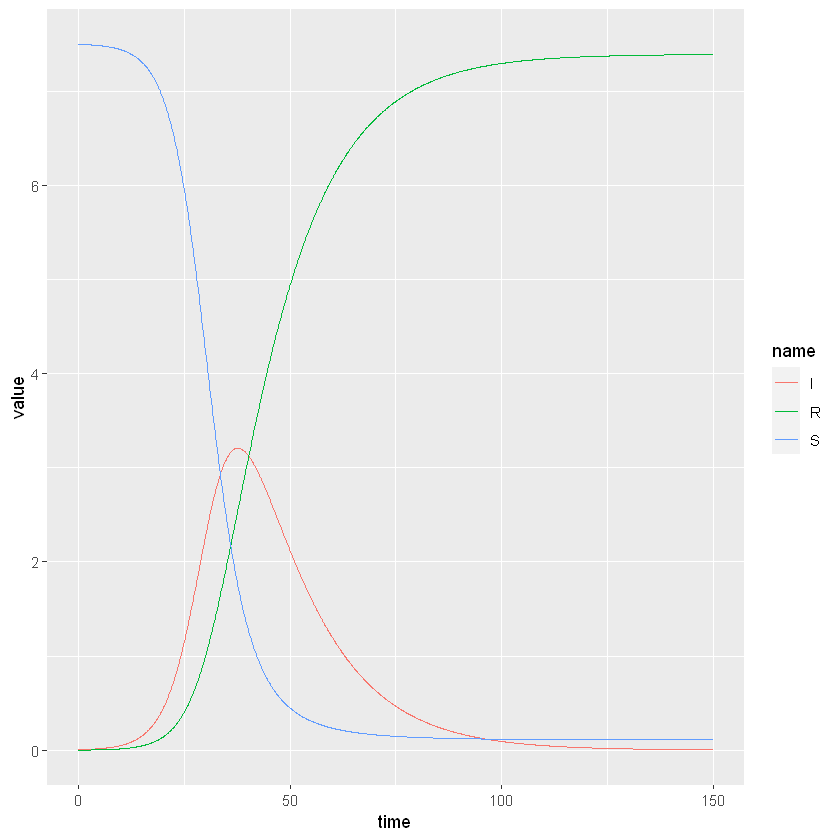

In [6]:
data.frame(solution) %>% 
  pivot_longer(cols = -time) %>% 
  ggplot(aes(x = time, y = value)) +
  #facet_wrap(~name, ncol = 1, scales = "free") +
  geom_line(aes(colour = name))

~3 millions de personnes infectées en ~40 jours. **👽 Rappel: c'est un cas fictif 👽**!!!

## Applatir la courbe

Le paramètre $\beta$ est fixe étant donné que nous n'avons pas de remède pour guérir de la COVID-19 plus rapidement. Le nombre de personnes susceptibles pourrait être diminué avec un vaccin, qui n'existe toujours pas. Nous avons toutefois le pouvoir de modifier $\alpha$ avec des mesures de distanciation physique. Voyons la courbe d'infectio pour différentes valeurs de $\alpha$.

In [7]:
alpha_v <- seq(0, 0.1, by = 0.01)
solution_l <- list()
for (i in seq_along(alpha_v)) {
  p <- c(alpha = alpha_v[i], beta = 0.1)
  solution_l[[i]] <- data.frame(ode(y = N0, times = time, SIR_model, p)) %>% 
    pivot_longer(cols = -time) %>% 
    mutate(alpha = alpha_v[i])
}
solution <- do.call(rbind.data.frame, solution_l)

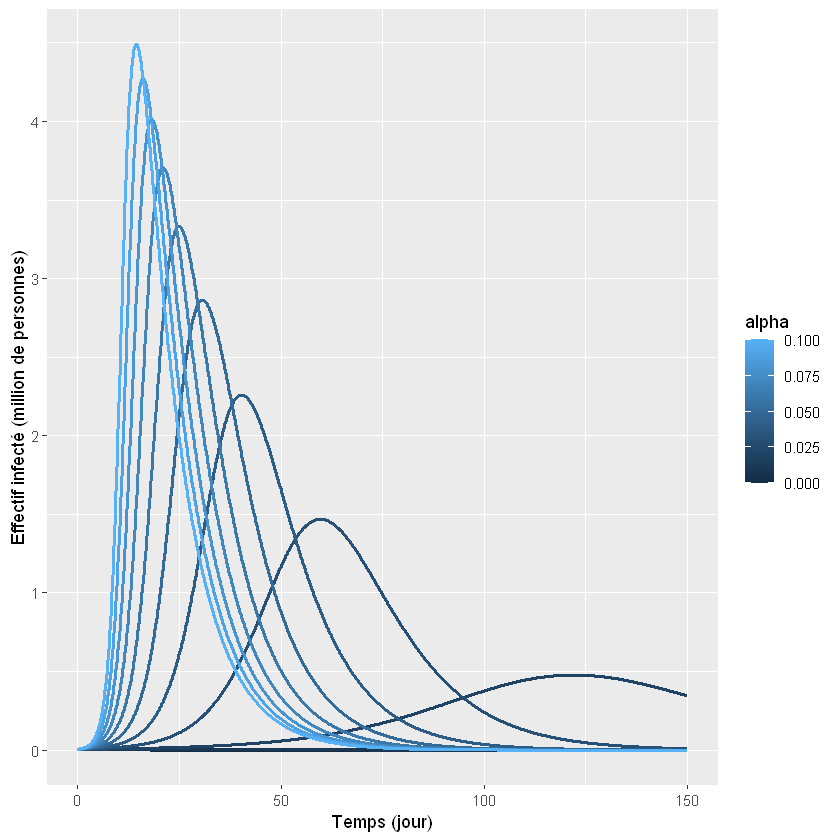

In [8]:
solution %>% 
  filter(name == "I") %>% 
  ggplot(aes(x = time, y = value)) +
  geom_line(aes(group = alpha, colour = alpha), size = 1) +
  labs(x = "Temps (jour)", y = "Effectif infecté (million de personnes)")

En diminuant $\alpha$, on applatit la courbe. D'où les mesures importantes prises au Québec depuis début mars.

![](https://media1.tenor.com/images/37d0b3187cd0489cb08254d705aeeaad/tenor.gif)

<small>Figure 3. Gif animé présentant [Horacio Arruda](https://fr.wikipedia.org/wiki/Horacio_Arruda), directeur de la santé publique du Québec, expliquant le concept d'applatissement de la courbe d'infection.</small>

## Allez plus loin

On pourra par la suite ajouter d'autres compartiments, stratifier les compartiments, ajouter un flux pour un taux possible de réinfection, ajuster les paramètre sur les donées existantes, créer des modèles régionaux aux paramètres différenciés, simuler des courbes selon les incertitudes que l'on a sur les paramètres, et l'on aurait un beau petit modèle épidémiologique plus représentatif de la réalité que cet exemple fictif.